# Abalone Dataset
# 전복 데이터 회귀

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [123]:
# Load the dataset
# github_url = 'https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/abalone.csv'
file_path = 'D:/K1_nam4/인공지능개론/artificial-intelligence/AI_class/artificial-intelligence/week5/dataFrame/abalone.csv'
abalone_data = pd.read_csv(file_path)
# 데이터셋의 첫 5개 행을 출력
abalone_data.head()


,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [124]:
# 데이터셋의 정보 출력
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4177 non-null   int64  
 1   Sex             4177 non-null   object 
 2   Length          4177 non-null   float64
 3   Diameter        4177 non-null   float64
 4   Height          4177 non-null   float64
 5   Whole_weight    4177 non-null   float64
 6   Shucked_weight  4177 non-null   float64
 7   Viscera_weight  4177 non-null   float64
 8   Shell_weight    4177 non-null   float64
 9   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB


In [125]:
# 데이터셋의 통계적 요약 출력
abalone_data.describe()

,id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,2088.000000,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,1205.940366,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1044.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,2088.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,3132.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,4176.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [126]:
# 데이터셋의 결측치 확인
abalone_data.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [127]:
abalone_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4172    False
4173    False
4174    False
4175    False
4176    False
Length: 4177, dtype: bool

In [128]:
# 데이터셋의 각 열의 고유값 개수 확인
# 각 열의 고유값 개수
unique_counts = abalone_data.nunique()
# 고유값 개수 출력
print(unique_counts)


id                4177
Sex                  3
Length             134
Diameter           111
Height              51
Whole_weight      2429
Shucked_weight    1515
Viscera_weight     880
Shell_weight       926
Rings               28
dtype: int64


In [129]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
columns = ['Sex']

for column in columns:
    abalone_data[column] = label_encoder.fit_transform(abalone_data[column])

In [130]:
abalone_data.head(8)

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,5,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,6,0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,7,0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16


In [131]:
abalone_data['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
29      1
26      1
2       1
25      1
Name: count, dtype: int64

In [132]:
# 데이터셋의 특성과 레이블 분리
X = abalone_data.drop(columns=['Rings'])
y = abalone_data['Rings']

In [133]:
X = X.values

In [134]:
X

array([[0.000e+00, 2.000e+00, 4.550e-01, ..., 2.245e-01, 1.010e-01,
        1.500e-01],
       [1.000e+00, 2.000e+00, 3.500e-01, ..., 9.950e-02, 4.850e-02,
        7.000e-02],
       [2.000e+00, 0.000e+00, 5.300e-01, ..., 2.565e-01, 1.415e-01,
        2.100e-01],
       ...,
       [4.174e+03, 2.000e+00, 6.000e-01, ..., 5.255e-01, 2.875e-01,
        3.080e-01],
       [4.175e+03, 0.000e+00, 6.250e-01, ..., 5.310e-01, 2.610e-01,
        2.960e-01],
       [4.176e+03, 2.000e+00, 7.100e-01, ..., 9.455e-01, 3.765e-01,
        4.950e-01]])

In [135]:
y = pd.get_dummies(y)

In [136]:
y.values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [137]:
# 데이터셋을 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3341, 9), (836, 9), (3341, 28), (836, 28))

In [138]:
# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [139]:
# 모델 학습
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [140]:
# 모델 생성
model = Sequential()
model.add(keras.Input(shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 8)              │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,457 (5.69 KB)

 Trainable params: 1,457 (5.69 KB)

 Non-trainable params: 0 (0.00 B)

In [141]:
# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0570 - mae: 0.1347 - val_loss: 0.0353 - val_mae: 0.0700
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0351 - mae: 0.0690 - val_loss: 0.0348 - val_mae: 0.0698
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0347 - mae: 0.0691 - val_loss: 0.0347 - val_mae: 0.0674
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0346 - mae: 0.0683 - val_loss: 0.0346 - val_mae: 0.0741
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0346 - mae: 0.0700 - val_loss: 0.0346 - val_mae: 0.0749
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0346 - mae: 0.0691 - val_loss: 0.0346 - val_mae: 0.0760
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0346 - mae: 0.0703 - val_loss: 0.0346 - val_mae: 0.0714
Epoch 8/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0348 - mae: 0.0697 - val_loss: 0.0345 - val_mae: 0.0707
Epoch 9/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.034

In [142]:
# 모델 평가
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0344 - mae: 0.0687 
Test Loss: 0.0344
Test MAE: 0.0686


In [143]:
# 예측
y_pred = model.predict(X_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


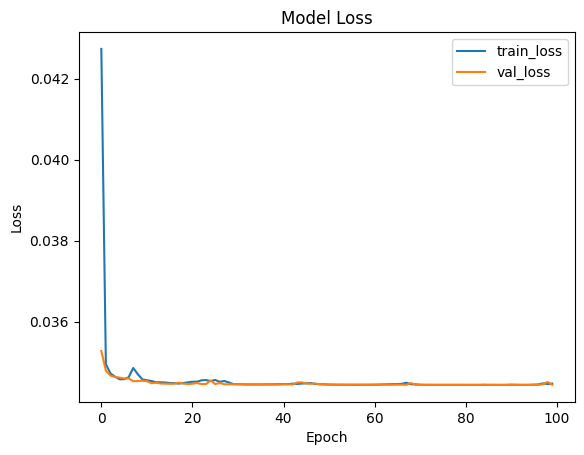

In [144]:
# loss 시각화
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

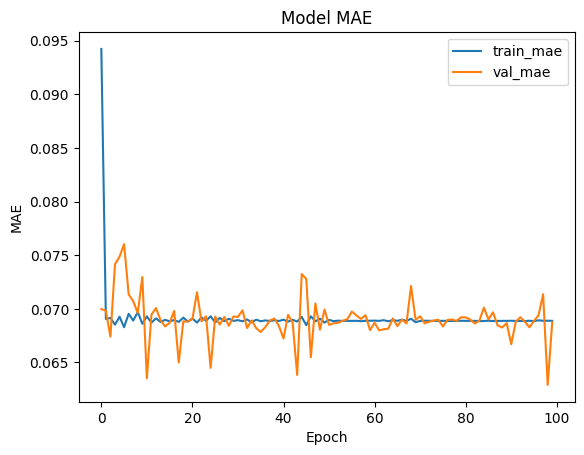

In [145]:
# MAE 시각화
plt.plot(history.history['mae'], label='train_mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [146]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0344 - mae: 0.0687 


[0.03444318100810051, 0.0686255469918251]